# **Bollywood celebrity face recogntion**

This project focuses on utilizing transfer learning techniques to recognize and classify faces of Bollywood celebrities. The model leverages pre-trained neural networks and fine-tunes them on a custom dataset of Bollywood actors and actresses, ensuring high accuracy and efficiency.

Features:

1. Transfer Learning: Utilizes state-of-the-art pre-trained models (such as VGG16, InceptionV3, etc.) and fine-tunes them on the Bollywood dataset.
2. High Accuracy: Achieves high accuracy in recognizing Bollywood celebrities through careful training and optimization.
3. Custom Dataset: Includes a dataset comprising images of various Bollywood celebrities, pre-processed and annotated for training.
4. Scalable: Easily extendable to include more celebrities or adapt to different datasets.
5. Python Implementation: Entirely implemented in Python using popular libraries such as TensorFlow, Keras, and matplotlib.

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, ResNet50, MobileNet
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

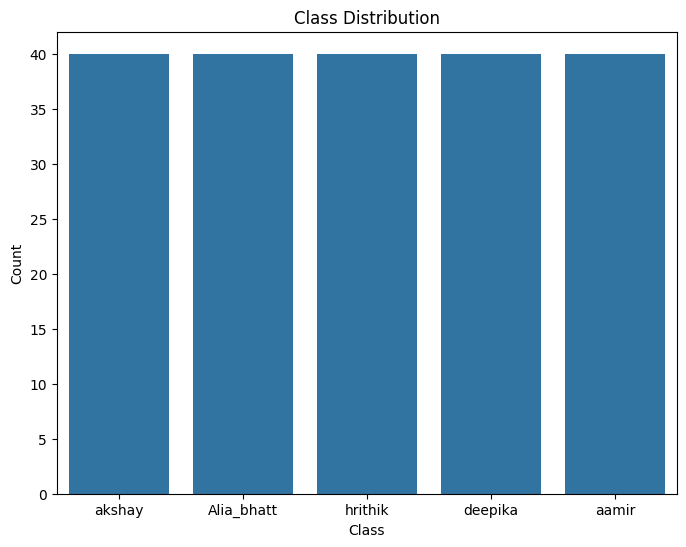

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import load_img

# Define directories
train_dir = '/content/drive/MyDrive/bollywood/train'
test_dir = '/content/drive/MyDrive/bollywood/test'
val_dir = '/content/drive/MyDrive/bollywood/val'

# Function to plot class distribution
def plot_class_distribution(directory):
    class_counts = {}
    for subdir in os.listdir(directory):
        class_counts[subdir] = len(os.listdir(os.path.join(directory, subdir)))
    plt.figure(figsize=(8, 6))
    sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
    plt.title("Class Distribution")
    plt.xlabel("Class")
    plt.ylabel("Count")
    plt.show()

# Plot class distribution for training data
plot_class_distribution(train_dir)



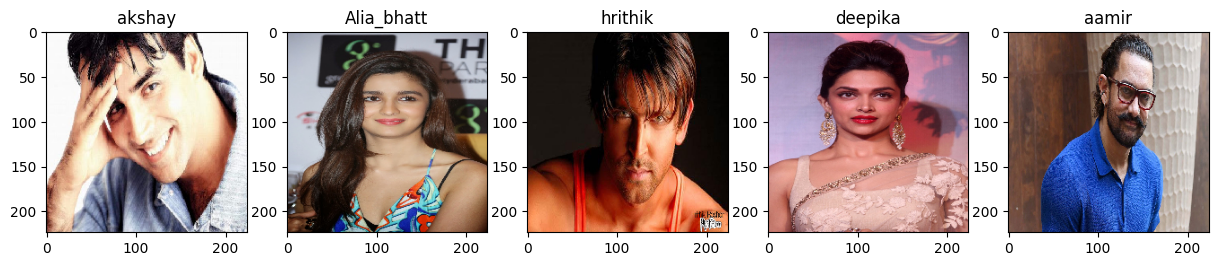

In [35]:
def display_sample_images(directory, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i, subdir in enumerate(os.listdir(directory)[:num_images]):
        img_file = os.listdir(os.path.join(directory, subdir))[0]
        img_path = os.path.join(directory, subdir, img_file)
        img = load_img(img_path, target_size=(224, 224))
        axes[i].imshow(img)
        axes[i].set_title(subdir)
        # axes[i].axis('off')
    plt.show()

# Display sample images from training data
display_sample_images(train_dir)

In [36]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = r'/content/drive/MyDrive/bollywood/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(

    directory = r'/content/drive/MyDrive/bollywood/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 196 files belonging to 5 classes.
Found 150 files belonging to 5 classes.


In [37]:
# Assuming 'train_ds' and 'validation_ds' are TensorFlow Datasets
import tensorflow as tf

def process(image, label):
    image = tf.cast(image/255., tf.float32)
    # One-hot encode the labels
    label = tf.one_hot(label, depth=5)  # Assuming you have 5 classes
    return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [38]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(5,activation='softmax'))

In [39]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_379 (Conv2D)         (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_380 (Conv2D)         (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 62, 62, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_381 (Conv2D)         (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 30, 30, 128)      

In [40]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [41]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
7/7 [==============================] - 5s 314ms/step - loss: 2.7685 - accuracy: 0.2041 - val_loss: 1.6362 - val_accuracy: 0.2000
Epoch 2/10
7/7 [==============================] - 5s 490ms/step - loss: 1.6613 - accuracy: 0.1684 - val_loss: 1.6103 - val_accuracy: 0.2000
Epoch 3/10
7/7 [==============================] - 3s 282ms/step - loss: 1.6083 - accuracy: 0.2551 - val_loss: 1.5967 - val_accuracy: 0.2800
Epoch 4/10
7/7 [==============================] - 4s 485ms/step - loss: 1.5574 - accuracy: 0.2806 - val_loss: 1.7058 - val_accuracy: 0.2000
Epoch 5/10
7/7 [==============================] - 4s 419ms/step - loss: 1.4804 - accuracy: 0.3316 - val_loss: 1.5177 - val_accuracy: 0.3400
Epoch 6/10
7/7 [==============================] - 3s 284ms/step - loss: 1.1357 - accuracy: 0.5612 - val_loss: 1.7726 - val_accuracy: 0.2733
Epoch 7/10
7/7 [==============================] - 4s 487ms/step - loss: 1.0133 - accuracy: 0.6735 - val_loss: 1.6531 - val_accuracy: 0.3733
Epoch 8/10
7/7 [====

In [42]:
train_dir = '/content/drive/MyDrive/bollywood/train'
test_dir = '/content/drive/MyDrive/bollywood/test'
validation_dir = '/content/drive/MyDrive/bollywood/val'

# Preprocessing and data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')


Found 196 images belonging to 5 classes.
Found 110 images belonging to 5 classes.
Found 150 images belonging to 5 classes.


###VGG MODEL

In [43]:
def create_vgg_model():
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    for layer in base_model.layers:
        layer.trainable = False
    model = Sequential([
        base_model,
        Flatten(),
        Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.5),  # Add dropout layer
        Dense(5, activation='softmax')
    ])
    return model

In [44]:
# Compile and train the models
vgg_model = create_vgg_model()
vgg_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
vgg_history = vgg_model.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10
6/7 [========================>.....] - ETA: 0s - loss: 5.0843 - accuracy: 0.2195

/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:858: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


7/7 [==============================] - 8s 862ms/step - loss: 5.3048 - accuracy: 0.2194 - val_loss: 3.7046 - val_accuracy: 0.3727
Epoch 2/10
7/7 [==============================] - 5s 725ms/step - loss: 3.4537 - accuracy: 0.2908 - val_loss: 2.3157 - val_accuracy: 0.2909
Epoch 3/10
7/7 [==============================] - 7s 968ms/step - loss: 1.6830 - accuracy: 0.4439 - val_loss: 1.1898 - val_accuracy: 0.5182
Epoch 4/10
7/7 [==============================] - 5s 744ms/step - loss: 1.2524 - accuracy: 0.4796 - val_loss: 1.2629 - val_accuracy: 0.4364
Epoch 5/10
7/7 [==============================] - 7s 909ms/step - loss: 1.0909 - accuracy: 0.5816 - val_loss: 1.1896 - val_accuracy: 0.4364
Epoch 6/10
7/7 [==============================] - 7s 1s/step - loss: 1.0821 - accuracy: 0.5306 - val_loss: 1.1172 - val_accuracy: 0.5455
Epoch 7/10
7/7 [==============================] - 7s 951ms/step - loss: 0.9555 - accuracy: 0.6071 - val_loss: 1.0779 - val_accuracy: 0.6000
Epoch 8/10
7/7 [==================

###MOBILNET MODEL

In [53]:
def create_mobilenet_model():
    base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    for layer in base_model.layers:
        layer.trainable = False
    model = Sequential([
        base_model,
        Flatten(),
        Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.5),  # Add dropout layer
        Dense(5, activation='softmax')
    ])
    return model


In [54]:
mobilenet_model = create_mobilenet_model()
mobilenet_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
mobilenet_history = mobilenet_model.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10
7/7 [==============================] - 9s 992ms/step - loss: 19.9313 - accuracy: 0.2908 - val_loss: 11.3926 - val_accuracy: 0.4545
Epoch 2/10
7/7 [==============================] - 5s 706ms/step - loss: 8.5097 - accuracy: 0.5510 - val_loss: 7.8252 - val_accuracy: 0.4909
Epoch 3/10
7/7 [==============================] - 5s 714ms/step - loss: 5.0331 - accuracy: 0.6735 - val_loss: 3.3494 - val_accuracy: 0.5818
Epoch 4/10
7/7 [==============================] - 6s 1s/step - loss: 2.6300 - accuracy: 0.6990 - val_loss: 3.9766 - val_accuracy: 0.5364
Epoch 5/10
7/7 [==============================] - 5s 783ms/step - loss: 1.3059 - accuracy: 0.7959 - val_loss: 2.7515 - val_accuracy: 0.5727
Epoch 6/10
7/7 [==============================] - 5s 704ms/step - loss: 1.0138 - accuracy: 0.8265 - val_loss: 1.9825 - val_accuracy: 0.6000
Epoch 7/10
7/7 [==============================] - 6s 921ms/step - loss: 0.3473 - accuracy: 0.9235 - val_loss: 1.8142 - val_accuracy: 0.6455
Epoch 8/10
7/7 [=====

# **InceptionV3**

In [55]:
from tensorflow.keras.applications import InceptionV3


In [56]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

def create_inception_model():
    inception = InceptionV3(include_top=False, weights='imagenet', input_shape=(200, 200, 3))

    # Freeze the weights of the InceptionV3 layers
    for layer in inception.layers:
        layer.trainable = False

    # Build the custom model
    incModel = Sequential([
        inception,
        GlobalAveragePooling2D(), # Now correctly imported
        Dense(256, activation='relu'),
        # layers.Dropout(0.5),
        Dense(5, activation='softmax'),
    ])
    return incModel

In [57]:
inception_model = create_inception_model()
inception_model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
inception_history = inception_model.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10
7/7 [==============================] - 13s 971ms/step - loss: 2.0400 - accuracy: 0.3265 - val_loss: 1.0863 - val_accuracy: 0.5182
Epoch 2/10
7/7 [==============================] - 6s 944ms/step - loss: 1.0187 - accuracy: 0.5918 - val_loss: 0.8877 - val_accuracy: 0.6273
Epoch 3/10
7/7 [==============================] - 7s 945ms/step - loss: 0.7496 - accuracy: 0.6888 - val_loss: 0.8085 - val_accuracy: 0.6818
Epoch 4/10
7/7 [==============================] - 5s 748ms/step - loss: 0.5278 - accuracy: 0.8112 - val_loss: 0.8039 - val_accuracy: 0.6545
Epoch 5/10
7/7 [==============================] - 5s 729ms/step - loss: 0.5063 - accuracy: 0.7806 - val_loss: 0.8233 - val_accuracy: 0.6182
Epoch 6/10
7/7 [==============================] - 6s 932ms/step - loss: 0.4215 - accuracy: 0.8520 - val_loss: 0.7736 - val_accuracy: 0.6636
Epoch 7/10
7/7 [==============================] - 5s 726ms/step - loss: 0.4351 - accuracy: 0.8469 - val_loss: 0.8521 - val_accuracy: 0.6091
Epoch 8/10
7/7 [===

# Hyperparameter tuning

In [58]:
def create_inception1_model():
    inception = InceptionV3(include_top=False, weights='imagenet', input_shape=(200, 200, 3))

# Freeze the weights of the InceptionV3 layers
    for layer in inception.layers:
      layer.trainable = False

# Build the custom model
    incModel1 = Sequential([
    inception,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax'),
    ])
    return incModel1



In [59]:
inception1_model = create_inception1_model()
inception1_model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
inception1_history = inception1_model.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10
7/7 [==============================] - 13s 1s/step - loss: 1.9265 - accuracy: 0.3469 - val_loss: 1.1823 - val_accuracy: 0.4455
Epoch 2/10
7/7 [==============================] - 5s 730ms/step - loss: 1.6459 - accuracy: 0.4133 - val_loss: 1.1726 - val_accuracy: 0.4818
Epoch 3/10
7/7 [==============================] - 6s 949ms/step - loss: 1.3300 - accuracy: 0.4949 - val_loss: 0.8648 - val_accuracy: 0.6364
Epoch 4/10
7/7 [==============================] - 5s 724ms/step - loss: 0.8580 - accuracy: 0.6276 - val_loss: 0.8718 - val_accuracy: 0.6182
Epoch 5/10
7/7 [==============================] - 6s 940ms/step - loss: 0.9466 - accuracy: 0.6071 - val_loss: 0.8788 - val_accuracy: 0.6545
Epoch 6/10
7/7 [==============================] - 5s 729ms/step - loss: 0.8218 - accuracy: 0.6429 - val_loss: 0.8190 - val_accuracy: 0.6273
Epoch 7/10
7/7 [==============================] - 5s 732ms/step - loss: 0.7692 - accuracy: 0.6735 - val_loss: 0.8247 - val_accuracy: 0.6182
Epoch 8/10
7/7 [======

###Evaluating and Comparing the performance of the models

5/5 [==============================] - 2s 372ms/step - loss: 0.9227 - accuracy: 0.6133
VGG Model Test Accuracy: 0.6000000238418579
MobileNet Model Test Accuracy: 0.5933333039283752
inception Model Test Accuracy: 0.5600000023841858
inception1 Model Test Accuracy: 0.6133333444595337


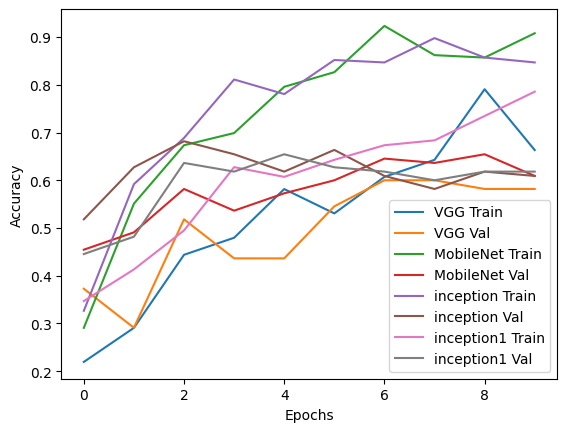

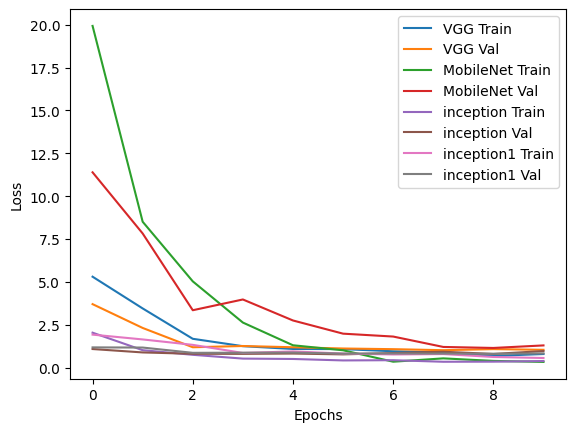

In [60]:
# Evaluate the models on the test set
vgg_scores = vgg_model.evaluate(test_generator)
mobilenet_scores = mobilenet_model.evaluate(test_generator)
inception_scores = inception_model.evaluate(test_generator)
inception1_scores = inception1_model.evaluate(test_generator)


print("VGG Model Test Accuracy:", vgg_scores[1])
print("MobileNet Model Test Accuracy:", mobilenet_scores[1])
print("inception Model Test Accuracy:", inception_scores[1])
print("inception1 Model Test Accuracy:", inception1_scores[1])

# Plot training and validation accuracy
plt.plot(vgg_history.history['accuracy'], label='VGG Train')
plt.plot(vgg_history.history['val_accuracy'], label='VGG Val')
plt.plot(mobilenet_history.history['accuracy'], label='MobileNet Train')
plt.plot(mobilenet_history.history['val_accuracy'], label='MobileNet Val')
plt.plot(inception_history.history['accuracy'], label='inception Train')
plt.plot(inception_history.history['val_accuracy'], label='inception Val')
plt.plot(inception1_history.history['accuracy'], label='inception1 Train')
plt.plot(inception1_history.history['val_accuracy'], label='inception1 Val')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(vgg_history.history['loss'], label='VGG Train')
plt.plot(vgg_history.history['val_loss'], label='VGG Val')
plt.plot(mobilenet_history.history['loss'], label='MobileNet Train')
plt.plot(mobilenet_history.history['val_loss'], label='MobileNet Val')
plt.plot(inception_history.history['loss'], label='inception Train')
plt.plot(inception_history.history['val_loss'], label='inception Val')
plt.plot(inception1_history.history['loss'], label='inception1 Train')
plt.plot(inception1_history.history['val_loss'], label='inception1 Val')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Model Save

In [61]:
vgg_model.save("/content/drive/MyDrive/bollywood_vgg.h5")
mobilenet_model.save("/content/drive/MyDrive/bollywood_mobilenet.h5")
inception_model.save("/content/drive/MyDrive/bollywood_inception.h5")
inception1_model.save("/content/drive/MyDrive/bollywood_inception1.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


##Model Testing


Predictions using VGG model:
Image: /content/drive/MyDrive/bollywood/val/hrithik/104.jpg
1/1 [==============================] - 0s 20ms/step


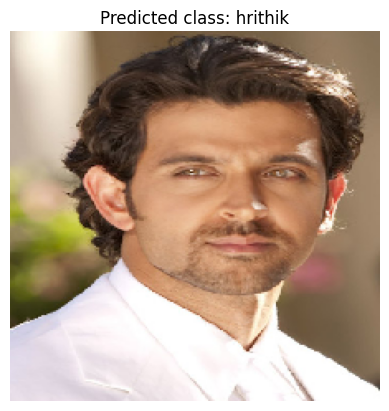


Image: /content/dp1.jpg
1/1 [==============================] - 0s 19ms/step


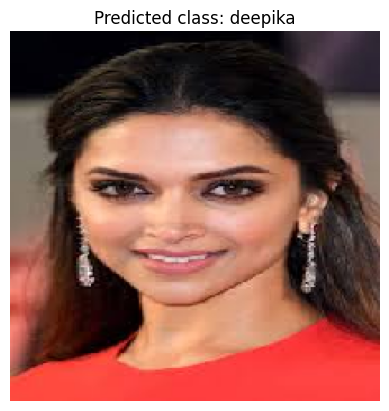


Predictions using MobileNet model:
Image: /content/drive/MyDrive/bollywood/val/hrithik/104.jpg
1/1 [==============================] - 0s 20ms/step


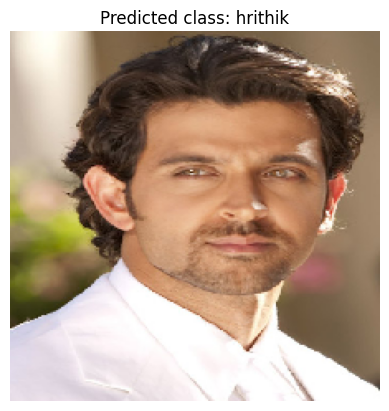


Image: /content/dp1.jpg
1/1 [==============================] - 0s 28ms/step


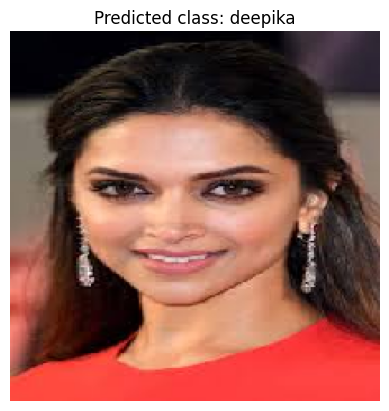


Predictions using Inception model:
Image: /content/drive/MyDrive/bollywood/val/hrithik/104.jpg
1/1 [==============================] - 0s 25ms/step


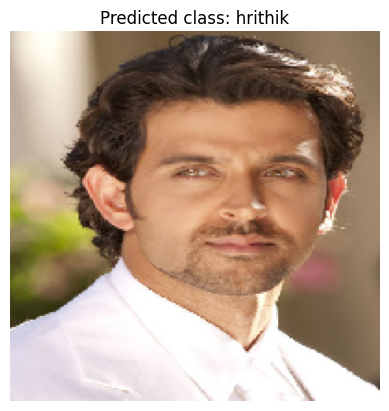


Image: /content/dp1.jpg
1/1 [==============================] - 0s 25ms/step


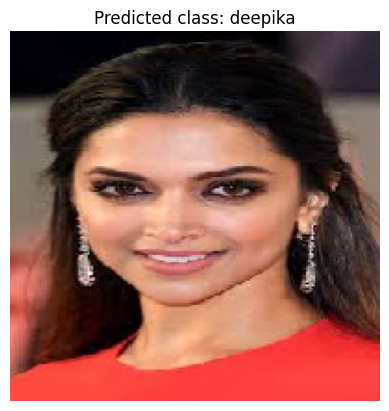


Predictions using Inception1 model:
Image: /content/drive/MyDrive/bollywood/val/hrithik/104.jpg
1/1 [==============================] - 0s 25ms/step


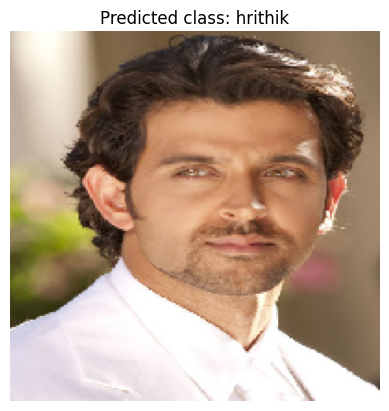


Image: /content/dp1.jpg
1/1 [==============================] - 0s 40ms/step


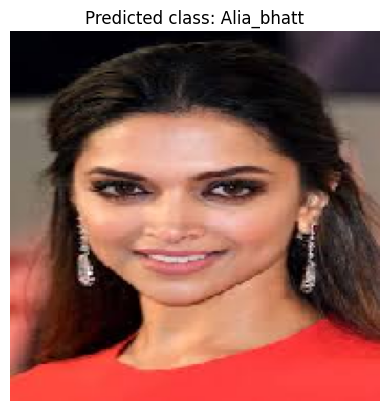

In [66]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

def predict_image(model, img_path, class_labels):
    # Determine the correct input size for the model
    input_shape = model.input_shape[1:3]  # Extract input size from the model

    img = tf.keras.preprocessing.image.load_img(img_path, target_size=input_shape)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize the image

    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction, axis=1)[0]
    predicted_class_label = class_labels[predicted_class_index]

    # Display the image with the predicted class label
    plt.imshow(tf.keras.preprocessing.image.array_to_img(img_array[0]))
    plt.title(f"Predicted class: {predicted_class_label}")
    plt.axis('off')
    plt.show()


# Test images paths
test_images = [
    '/content/drive/MyDrive/bollywood/val/hrithik/104.jpg',
    '/content/dp1.jpg'
]  # Replace with your test image paths

# Define your class labels
class_labels = ['Alia_bhatt', 'aamir', 'akshay', 'deepika', 'hrithik']  # Replace with your actual class names

# Test the images with each model
for model, model_name in zip([vgg_model, mobilenet_model, inception_model, inception1_model], ['VGG', 'MobileNet', 'Inception', 'Inception1']):
    print(f"Predictions using {model_name} model:")
    for img_path in test_images:
        print(f"Image: {img_path}")
        predict_image(model, img_path, class_labels)
        print()
